# __Regularización en Modelos Lineales__ 

La mejor manera de reducir el sobreajuste en un modelo lineal es con la regularización. Este proceso consiste en restringir los pesos del modelo ayudando a que no se ajuste tanto a los datos. Existen tres formas de restringir los pesos como verémos a continuación:

# __Regresión Ridge__

Tambien llamada regularización de Tikhonov, es una versión regularizada de la regresión lineal y consiste en agregar el término $\alpha \sum_{i}^{n} w_{i}^2$ a la función de costo. Esto obliga al algoritmo de aprendizaje a no sólo ajustar los datos, sino tambien a mantener los pesos del modelo los más pequeño posible.

- Este término sólo debe agregarse a la función de costo durante el entrenamiento. Una vez entrenado, se evalúa el rendimiento del modelo utilizando una medida no regularizada.

- Es común que la función de costo usada durante el entrenamiento sea diferente de la medida de rendimiento del modelo.

- La función de costo utilizada en el entrenamiento debe tener derivadas amigables para la optimización mientras que la medida de rendimiento debe estar lo más cerca posible del objetivo final.

- El parámetro $\alpha$ controla cuánto desea regularizar el modelo. Si $\alpha=0$, la regresión Ridge se vuelve una regresión lineal. Si $\alpha$ es muy grande, todos los pesos terminan muy cerca de cero y el resultado es una línea plana que pasa por la media de los datos.

- Es importante escalar los datos con _StandarScaler_ antes de aplicar la regularización ya que es sensible a la escala de las características de entrada.

## Cómo funciona?

Vamos a suponer un problema de regresión lineal simple. Queremos predecir $y$ a partir de $x$ usando la función lineal:

$$y_i = wx_i + b$$

Los datos con los que contamos son los siguientes:

| x | y   |
| - | --- |
| 1 | 2   |
| 2 | 4   |
| 3 | 6.1 |


> Nótese que hay una relación lineal entre los datos de $y \approx 2x$ con un poco de ruido.

En regresión lineal, se busca minimizar el error cuadrático medio _(MSE)_ cuya fórmula viene dada por:

$$ J(w,b) = \frac{1}{n}\sum_{i=1}^{n}(y_i - (wx_i + b))^2$$

Esta función busca ajustar el modelo lo mejor posible a los datos. En nuestro caso, y para simplificar el cálculo, el intercepto es cero ($b=0$) por lo que el _MSE_ nos quedaría:

$$ J(w) = \frac{1}{n}\sum_{i=1}^{n}(y_i - wx_i)^2$$

Los pesos $w$ son los encargados de ajustar el modelo a los datos. Cuando se presenta sobreajuste, una forma de contrarrestarlo es modificando los pesos y de esa forma reajustar el modelo a los nuevos datos. Para obtener la fórmula de los pesos $w$ procedemos como sigue:

- Derivamos $J(w)$ respecto a $w$ y lo igualamos a cero:

$$\frac{\mathrm{d} J}{\mathrm{d} w} = \frac{1}{n} \sum_{i=1}^{n} 2(y_i - wx_i)(-x_i) = 0$$

- El 2 deja de tener relevancia, por tanto

$$\sum_{i=1}^{n} x_i(y_i - wx_i) = 0$$

- Expandimos

$$\sum_{i=1}^{n} x_iy_i - \sum_{i=1}^{n}x_{i}^2 = 0$$

- Despejamos $w$

$$w = \frac{\sum_{i=1}^{n} x_i y_i}{\sum_{i=1}^{n} x_{i}^2}$$

La fórmula del error cuadrático medio, al agregar la regularización Ridge, queda de la siguiente forma:

$$J_{ridge}(w) = \frac{1}{n}\sum_{i=1}^{n}(y_i - wx_i)^2 + \alpha w^2$$

Aplicando la misma optimización anterior para obtener $w_{ridge}$ quedaría:

$$w_{ridge} = \frac{\sum_{i=1}^{n} x_i y_i}{\sum_{i=1}^{n} x_{i}^2 + n\alpha}$$

el término $n$ suaviza los coeficientes. A partir de esta fórmula podemos deducir que:

- Si $\alpha = 0$, llegamos a la regresión lineal estándar.

- Si $\alpha > 0$, regula los pesos del modelo manteniendólos pequeños lo que reduce el riesgo a sobreajuste.

- Si $\alpha >> 0$, los pesos terminan muy cerca de cero lo que hace que el modelo tienda a una línea horizontal.

Ahora, como en nuestro ejemplo sólo hay un peso, vamos a calcularlo con y sin regularización ($w$ y $w_{ridge}$)

$$w = \frac{\sum_{i=1}^{n} x_i y_i}{\sum_{i=1}^{n} x_{i}^2} = \frac{1\cdot 2 + 2 \cdot 4 + 3\cdot 6.1}{1^2 + 2^2 + 3^2} = \frac{2 + 8 + 18.3}{1 + 4 + 9} = \frac{28.3}{14} \approx 2.021$$

El peso estimado $w$ es cercano a 2.

Para calcular $w_{ridge}$ utilizamos $\alpha = 1$

$$w_{ridge} = \frac{\sum_{i=1}^{n} x_i y_i}{\sum_{i=1}^{n} x_{i}^2 + \alpha} = \frac{1\cdot 2 + 2 \cdot 4 + 3\cdot 6.1}{1^2 + 2^2 + 3^2 + 1} = \frac{2 + 8 + 18.3}{1 + 4 + 9 + 1} = \frac{28.3}{15} \approx 1.887$$

El peso estimado utilizando rigde $w_{ridge}$ se reduce ligeramente, lo que evidencia el efecto de la penalización.

En resumen:

> Rigde no elimina las variables, sólo reduce los pesos.

> Cuanto mayor sea $\alpha$, más se reducen los pesos.

> En modelos con muchas variables correlacionadas, ayuda a distribuir mejor el peso y evitar sobreajuste.

## Cuando usar Ridge

- Cuando hay muchas variables numéricas.

- Cuando hay colinealidad entre variables.

- Cuando el modelo presenta sobreajuste.

- Cuando quieres mantener todos las variables del modelo haciendo los coeficientes pequeños, no ceros.

## Implementación de Ridge con Scikit-Learn 

Para este ejemplo, vamos a utilizar un conjunto de datos artificiales con relación lineal y algo de ruido, ajustamos un modelo lineal simple y varios con diferentes valores de ridge y finalmente comparamos el rendimiento de cada uno.

In [1]:
# librerias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [5]:
# crear datos artificiales
np.random.seed(42)
X = 2*np.random.rand(100, 1)
y = 4 + 2*X + np.random.randn(100, 1)*1.5

# dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# modelo de regresion lineal
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# modelo con regularizacion ridge alpha = 1
ridge_1 = Ridge(alpha=1)
ridge_1.fit(X_train, y_train)

# modelo con regularizacion ridge alpha = 10
ridge_10 = Ridge(alpha=10)
ridge_10.fit(X_train, y_train)

# modelo con regularizacion ridge alpha = 20
ridge_20 = Ridge(alpha=20)
ridge_20.fit(X_train, y_train)

# predicciones de ambos modelos
y_pred_lr = model_lr.predict(X_test)
y_pred_ridge_1 = ridge_1.predict(X_test)
y_pred_ridge_10 = ridge_10.predict(X_test)
y_pred_ridge_20 = ridge_20.predict(X_test)

# evaluar rendimiento
mse_lr = mean_squared_error(y_test, y_pred_lr)
mse_ridge_1 = mean_squared_error(y_test, y_pred_ridge_1)
mse_ridge_10 = mean_squared_error(y_test, y_pred_ridge_10)
mse_ridge_20 = mean_squared_error(y_test, y_pred_ridge_20)

# mostrar resultados
print(f'Coeficiente Lineal: {model_lr.coef_}')
print(f'Coeficiente Ridge (alpha = 1): {ridge_1.coef_}')
print(f'Coeficiente Ridge (alpha = 10): {ridge_10.coef_}')
print(f'Coeficiente Ridge (alpha = 20): {ridge_20.coef_}')
print(' ')
print('-'*64)
print(' ')
print(f'MSE Lineal: {mse_lr:.3f}')
print(f'MSE Ridge (alpha = 1): {mse_ridge_1:.3f}')
print(f'MSE Ridge (alpha = 10): {mse_ridge_10:.3f}')
print(f'MSE Ridge (alpha = 20): {mse_ridge_20:.3f}')

Coeficiente Lineal: [[1.69898549]]
Coeficiente Ridge (alpha = 1): [[1.6386124]]
Coeficiente Ridge (alpha = 10): [[1.24154884]]
Coeficiente Ridge (alpha = 20): [[0.97818207]]
 
----------------------------------------------------------------
 
MSE Lineal: 1.471
MSE Ridge (alpha = 1): 1.463
MSE Ridge (alpha = 10): 1.485
MSE Ridge (alpha = 20): 1.568


> El rendimiento de un modelo lineal se mide a través del error cuadrático medio (MSE).

> El MSE del modelo lineal es ligeramente mayor que el MSE Ridge con alfa = 1 lo que implica que el modelo ridge se sobreajusta mucho más a los datos.

> El modelo menos ajustado a los datos es el ridge con alfa = 20, lo que indica que este modelo es un buen candidato debido a que contrarresta el overfitting. 

Visualicémos los datos junto a los modelos.

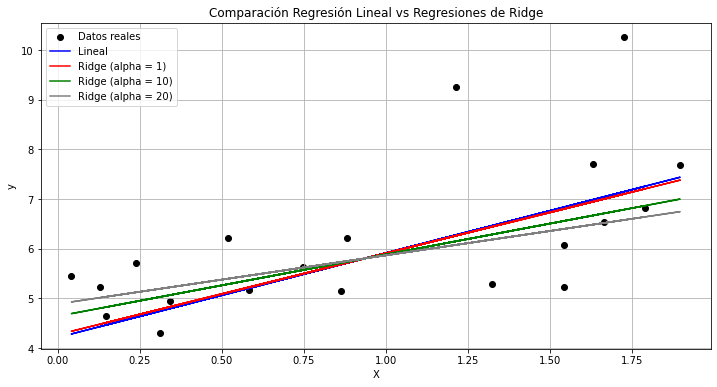

In [7]:

plt.figure(figsize=(12,6))
plt.scatter(X_test, y_test, color='black', label='Datos reales')
plt.plot(X_test, y_pred_lr, label='Lineal', color='blue')
plt.plot(X_test, y_pred_ridge_1, label='Ridge (alpha = 1)', color='red')
plt.plot(X_test, y_pred_ridge_10, label='Ridge (alpha = 10)', color='green')
plt.plot(X_test, y_pred_ridge_20, label='Ridge (alpha = 20)', color='gray')
plt.title('Comparación Regresión Lineal vs Regresiones de Ridge')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

> Los modelos con mayor sobreajuste son el modelo lineal y el ridge con alfa = 1. (rojo y azul)

> El modelo rigde con alfa = 20 (gris), es el menos sobreajustado a los datos. También es el más cercano a una línea horizontal lo que corresponde al efecto de alfas grandes.

# __Regresión Lasso__

Conocida tambien como _Regresión por el Operador de Selección y Reducción Absoluta Mínima_, agrega un término de regularización a la función de costo, al igual que ridge, pero utiliza la suma de los valores absolutos de los pesos del modelo (la norma), $\alpha \sum_{i}^{n} \left |{w_{i}} \right |$.

- Este término también se agrega a la función de costo durante el entrenamiento y para evaluar el rendimiento del modelo se usa una medida no regularizada.

- Los datos deben escalarse antes de usar lasso para evitar sesgo por diferentes magnitudes.

- El parámetro $\alpha$ controla la regularización del modelo. Si $\alpha = 0$ se llega a la regresión lineal. Si $\alpha$ es grande muchos pesos se hacen cero lo que ayuda a seleccionar las variables que realmente influyen sobre el modelo.

## Cómo funciona?

Supongamos que queremos predecir una variable $y$ a partir de dos variables $x_1$ y $x_2$. Contamos con 3 observaciones:

| x₁ | x₂ | y |
| -- | -- | - |
| 1  | 0  | 1 |
| 0  | 1  | 1 |
| 1  | 1  | 2 |


Los datos viene modelados por un modelo de regresión lineal:

$$y = w_{1}x_{1} + w_{2}x_{2}$$

Queremos encontrar los valores de $w_{1}$ y $w_{2}$ que minimicen el error cuadrático medio (MSE) y también que minimíce el error cuadratico medio (MSE) con un término adicional llamado regularización Lasso.

El MSE del modelo lineal viene dado por:

$$J(w) =  = \sum_{i=1}^{3}(y_i -(w_{1}x_{1i} + x_{2}w_{2i}))^2$$

Mientras que el MSE con regularización viene dado por:

$$J_{lasso}(w_1, w_2) =  = \sum_{i=1}^{3}(y_i -(w_{1}x_{1i} + x_{2}w_{2i}))^2 + \alpha(\left | w_1\right | + \left | w_2\right |)$$

Expandiendo $J_{lasso}(w_1, w_2)$ obtenemos la función que queremos minimizar respecto a $w_1$ y $w_2$.

$$J(w_1, w_2) = (1 - w_{1})^2 + (1 - w_{2})^2 + (2 - w_{1} - w_{2})^2 + \alpha(\left | w_{1}\right | + \left | w_2\right |)$$

Si $\alpha = 0$, llegamos a $J(w)$. Vamos a obtener el mínimo para esta función derivando con respecto a $w_1$ y $w_2$ e igualando a cero:

$$ \frac{\partial J}{\partial w_{1}} = -2(1 - w_1) - 2(2 - w_{1} - w_{2}) = 0$$

$$ \frac{\partial J}{\partial w_{2}} = -2(1 - w_2) - 2(2 - w_{1} - w_{2}) = 0$$

Resolviendo este sistema obtenemos:

$$w_{1} = 1, w_{2} = 1$$

Ahora, probemos que los valores de $w_1$ y $w_2$ sean los adecuados:

- $y(x_{1}=1, x_{2}= 0) = (1)(1) + (0)(1) = 1$
- $y(x_{1}=0, x_{2}= 1) = (0)(1) + (1)(1) = 1$
- $y(x_{1}=1, x_{2}= 1) = (1)(1) + (1)(1) = 2$

Llegamos a los valores de $y$ dados en la tabla, por tanto, los pesos calculados son los correctos!

Ahora, vamos a minimizar la función $J_{lasso}(w)$ para $\alpha = 1$ 

$$J_{lasso}(w_1, w_2) = (1 - w_{1})^2 + (1 - w_{2})^2 + (2 - w_{1} - w_{2})^2 + 1 \cdot(\left | w_{1}\right | + \left | w_2\right |)$$

La tarea de minimizar esta función es compleja debido a que los términos de valor absoluto no son diferenciables en 0. Mediante un algoritmo de optimización como _Coordinate Descent_ obtenemos los siguientes valores para los pesos:

$$w_{1} = 0.9$$
$$w_{2} = 0.8, w_{2} = 0$$

El peso $w_2$ puede volverse exactamente 0 dependiendo de la magnitud $\alpha$

En resumen:

> Lasso reduce la magnitud de los coeficientes.

> Puede eliminar variables irrelevantes (haciendo selección automática de características).

> Un incremento de $\alpha$ hace que mayor cantidad de coeficientes tiendan a cero.

## Cuando usar Lasso

- Cuando hay muchas variables y no todas son importantes.

- Cuando las variables presentan multicolinealidad, haciendo que lasso tome una de ellas y descarta el resto.

- Cuando el número de variables es mayor que el número de observaciones.

- Cuando se busca reducir a cero algunos coeficientes.

## Implementación de Lasso con Scikit-Learn

En el siguiente ejemplo vamos a utilizar datos artificiales para mostrar cómo Lasso reduce los coeficientes irrelevantes a cero, ayudando a la selección de variables.

In [2]:
# librerias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# creamos una semilla para la reproducibilidad de los datos
np.random.seed(42)

# creamos 100 registros y 10 variables aleatoriamente
X = np.random.randn(100, 10)

# creamos la variable objetivo 'y' la cual sera influenciada solo por las
# 3 primeras variables
coef_reales = np.array([3, -2, 1.5] + [0]*7)
y = X @ coef_reales + np.random.randn(100)*0.5 # agrega ruido al modelo para simular que los datos no son perfectos

La ecuación de la regresion lineal, para estos datos, viene dada por:

$$y_i = 3x_{i1} - 2x_{i2} + 1.5x_{i3} + 0x_{i4} +  0x_{i5} +  0x_{i6} +  0x_{i7} +  0x_{i8} +  0x_{i9} +  0x_{i10}$$

Acá podemos notar que sólo las tres primeras variables son significativas para el modelo.

In [3]:
# estandarizamos los datos ara que esten en la misma escala
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# regresion lineal sin regularizacion
model_lineal = LinearRegression().fit(X_train, y_train)

# Regresion lasso con alpha = 0.1
model_lasso = Lasso(alpha=0.1).fit(X_train, y_train)

# prediccion de ambos modelos
y_pred = model_lineal.predict(X_test)
y_pred_lasso = model_lasso.predict(X_test)

# evaluacion de rendimiento
mse = mean_squared_error(y_test, y_pred)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

# mostrar resultados
print(f'Coeficiente Lineal: {model_lineal.coef_}')
print(f'Coeficiente Lasso (alpha = 0.1): {model_lasso.coef_}')
print(' ')
print('-'*64)
print(' ')
print(f'MSE Lineal: {mse:.3f}')
print(f'MSE Lasso (alpha = 0.1): {mse_lasso:.3f}')

Coeficiente Lineal: [ 2.66401254e+00 -2.10891648e+00  1.56952561e+00  3.83881365e-02
 -6.53192418e-02  6.02810939e-04 -1.45017449e-01  5.25787856e-02
  1.37554068e-02 -1.34499429e-02]
Coeficiente Lasso (alpha = 0.1): [ 2.55919486 -1.98725534  1.41597771  0.         -0.          0.
 -0.          0.          0.          0.        ]
 
----------------------------------------------------------------
 
MSE Lineal: 0.253
MSE Lasso (alpha = 0.1): 0.231


> Los coeficientes de la regresión lineal son distintos de cero en todas las variables, incluyendo en aquellas que sabemos no aportan al modelo.

> Sólo 3 coeficientes de la regresión Lasso son distinto de cero y corresponden a las variables que sabemos que aportan al modelo. Esto permite pasar de 10 a sólo 3 variables obteniendo un modelo igual de efectivo.

Aunque no podemos visualizar los datos en 10 dimensiones, podemos comparar los valores de los coeficientes en ambos modelos sabiendo de antemamo que las 3 primeras variables son las que influyen el modelo.

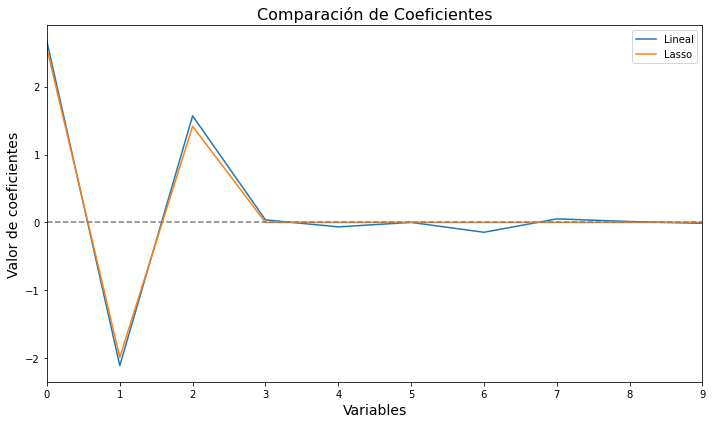

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(model_lineal.coef_, label='Lineal')
plt.plot(model_lasso.coef_, label='Lasso')
plt.axhline(0, color='gray', linestyle='--')
plt.title('Comparación de Coeficientes', fontsize=16, font='bold')
plt.xlabel('Indice de variable', fontsize=14)
plt.ylabel('Valor de coeficientes', fontsize=14)
plt.xlim(0, 9) 
plt.tight_layout()
plt.legend()
plt.show()

> Se evidencia que algunos coeficientes de la regresión lineal son muy cercanos a cero pero no cero. 

> A partir del tercer indice de variable (la variable $x_{i4}$), los coeficientes de la regresión Lasso son ceros.

> Ambos modelos tienen en cuenta la importancia de las 3 primeras variables y presentan valores muy similares. Sin embargo, el modelo Lasso reduce la complejidad del modelo pasando de 10 a solo 3 variables relvantes.

# __Regresión Elastic Net__

Es una regresión que combina Ridge y Lasso. Consiste en agregar el siguiente término a la función de costo:

$$ r\alpha\sum_{i=1}^{n}\left | w_i\right | + \frac{1-r}{2} \alpha\sum_{i=1}^{n}w_{i}^2$$

Se trata de la suma ponderada de los términos de regularización Lasso y Ridge que es controlada por el parámetro $r$. Cuando $r=0$, Elastic Net es equivalente a la regresión Ridge, y cuando $r=1$, es equivalente a la regresión Lasso.

Su objetivo es mejorar el rendimiento de los modelos lineales utilizando lo mejor de ambas regularizaciones: reduciendo los pesos, eliminando aquellos que no aportan y manteniendo la estabilidad entre ellos.

## Cómo funciona?

En regresión lineal clásica, se busca minimizar el error cuadrático medio (MSE):

$$ Costo = J(w) = \frac{1}{n}\sum_{i=1}^{n}(y_i - y)^2$$

Con Elastic Net, se agrega una penalización al función de costo:

$$Costo_{EN} = \frac{1}{n}\sum_{i=1}^{n}(y_i - y)^2 + \alpha[(1-r)(w_{1}^2 + w_{2}^2) + r(\left | w_1\right | + \left | w_2\right |)]$$

Donde

- $\alpha$ controla la fuerza de regularización.

- $r$ controla el peso entre Lasso y Ridge.

Supongamos que tenemos los siguientes datos y una sola variable $x$:

| x | y |
| - | - |
| 1 | 3 |
| 2 | 5 |
| 3 | 7 |
| 4 | 9 |

Queremos ajustar un modelo:

$$y = wx + b$$

Supongamos inicialmente que $b=0$. Vamos a buscar el mejor valor de $w$ que se ajuste a los datos y para ello, se minimiza la función $Costo$ en función de $w$. Sustituimos los datos en $J(w)$

$$J(w) = \frac{1}{4}[(3-w\cdot1)^2 + (5-w\cdot2)^2 + (7-w\cdot3)^2 + (9-w\cdot4)^2]$$

Al agregar la penalización Elastic Net obtenemos,

$$Costo_{EN} = J(w) + \alpha[r\left | w\right | + rw^2]$$

Supongamos que $\alpha=1$ y $r=0.5$, es decir, mezcla 50% Lasso y 50% Ridge. Entonces,

$$Costo_{EN} = J(w) + 1[0.5\left | w\right | + 0.5w^2]$$

Los cálculos para llegar al $w$ óptimo son complicados. Aun así, podemos interpretar la ecuación anterior para mostrar el efecto de la penalización en el ajuste del modelo.

> Si $w$ es muy grande, $w^2$ (Ridge) lo penaliza aún más.

> Si $w$ es pequeño pero no útil, $\left | w\right |$ (Lasso) puede llevarlo a cero.

> De esta forma Elastic Net combina ambas cosas: Limita la magnitud del peso y al mismo tiempo puede eliminar aquellos pesos que no aportan mucho. 

## Cuando usar Elastic Net

- Cuando hay muchas variables predictoras. Lasso tiende a seleccionar solo una de varias variables correlacionadas y eliminar el resto. Ridge las distribuye. Elastic Net combina lo mejor de ambos.

- Cuando hay multicolinealidad. Lasso puede volverse inestable al elegir una y descartar las otras. Elastic Net distribuye mejor el peso entre las variables correlacionadas.

- Cuando se busca tanto seleccion de variables como estabilidad. Lasso selecciona variables pero no es estable si hay correlacion. Ridge es estable pero no reduce a cero ningun coeficiente.

- Cuando se requiere un modelo mas generalizable.

## Implementacion de Elastic Net con Scikit Learn 

En el siguiente ejemplo vamos a usar datos artificiales correspondientes a un problema de regresion con variables altamente correlacionadas y algunas irrelevantes. Vamos aplicar los modelos de regresion Ridge, Lasso y Elastic Net para compararlos y mostrar su efectividad

In [10]:
# librerias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# creamos 100 registros y 10 variables predictoras
np.random.seed(0)
n_samples, n_features = 100, 10

# creamos correlacion entre variables predictoras
X = np.random.randn(n_samples, n_features)
X[:, 1] = X[:, 0] + 0.01 * np.random.randn(n_samples)  # Correlacionada con la 0
X[:, 2] = X[:, 0] - 0.01 * np.random.randn(n_samples)  # Correlacionada con la 0

# le damos coeficientes verdaderos solo a las primeras tres variables
true_coef = np.array([5, 2, 3, 0, 0, 0, 0, 0, 0, 0])
y = X @ true_coef + np.random.randn(n_samples) * 0.5  # y con algo de ruido

# dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# creamos los modelos con los parametros dados
models = {
    'Lineal': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.1),
    'ElasticNet': ElasticNet(alpha=0.1, l1_ratio=0.5) # 50% de lasso y 50% de ridge
}

results = {}

# Entrenar, predecir y guardar resultados
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    results[name] = {
        'modelo': model,
        'MSE': mse,
        'coef': model.coef_
    }

/home/jbernal/anaconda3/envs/data/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.438e-01, tolerance: 7.124e-01
  model = cd_fast.enet_coordinate_descent(


In [14]:
results

{'Lineal': {'modelo': LinearRegression(),
  'MSE': 0.24328154704898097,
  'coef': array([-6.27666743, 13.76522435,  2.46785828,  0.02333507, -0.02290574,
          0.09934   , -0.04904901,  0.01894229,  0.05354988,  0.06736018])},
 'Ridge': {'modelo': Ridge(),
  'MSE': 0.2721125934291895,
  'coef': array([ 3.28639926,  3.33621616,  3.28670601,  0.06222162, -0.05103253,
          0.08505703, -0.02840219,  0.03023754,  0.06045483,  0.05763128])},
 'Lasso': {'modelo': Lasso(alpha=0.1),
  'MSE': 0.3133836153968563,
  'coef': array([ 8.58384027,  1.26317819,  0.        ,  0.        , -0.        ,
          0.        , -0.        ,  0.        ,  0.        ,  0.        ])},
 'ElasticNet': {'modelo': ElasticNet(alpha=0.1),
  'MSE': 0.3614193349466798,
  'coef': array([ 3.22871047e+00,  3.24916934e+00,  3.24455971e+00,  2.23520361e-03,
         -2.09498239e-02,  2.09884713e-02, -0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00])}}

Debemos tener en cuenta que las tres primeras variables son las realmente relevantes y estan altamente correlacionadas. El resto son ruido.

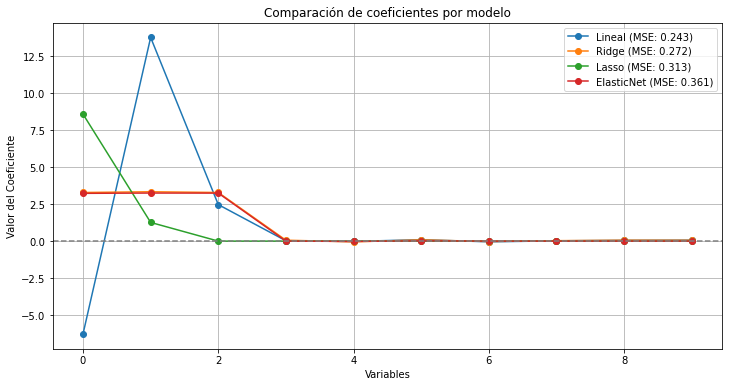

In [12]:
plt.figure(figsize=(12, 6))
for name, res in results.items():
    plt.plot(res['coef'], marker='o', label=f'{name} (MSE: {res["MSE"]:.3f})')

plt.axhline(0, color='gray', linestyle='--')
plt.title('Comparación de coeficientes por modelo')
plt.xlabel('Variables')
plt.ylabel('Valor del Coeficiente')
plt.legend()
plt.grid(True)
plt.show()

__Regresion Lineal__

> Asigna coeficientes grandes a las 3 primeras variables debido a que estan correlacionadas. Tambien asigna coeficientes pequenos a variables irrelevantes lo que causa sobreajuste.

> Tiene el menor MSE en test, pero menos interpretabilidad debido a que usa variables irrelevantes que ocacionan el sobreajuste.

__Regresion Ridge__

> Reduce los coeficientes grandes sin hacerlos cero. Conserva la informacion de las variables correlacionadas pero con menor magnitud. Esto lo hace mas estable y menos propenso al sobreajuste.

__Regresion Lasso__

> Elimina muchos coeficientes, conservando solo los de las 3 primeras variables. 

> Penaliza fuertemente la redundancia lo que afecta las variables relevantes que estan correlacionadas

__Elastic Net__

> Combina las ropiedades de lasso y ridge eliminando las variables que son ruido y manteniendo coeicientes moderados en las variables relevantes

> A pesar que orece un MSE ligeramente mayor, ofrece una buena combinacion de precision e interpretabilidad.

# A tener en cuenta

Casi siempre es preferible tener un poco de regularizacion en problemas de regresion lineal, por lo que se debe evitar la regresion lineal simple.

Ridge es un buen valor predeterminado, pero si sospecha que solo unas pocas variables predictoras son utiles, es preferible que utilice Lasso o Elastic Net porque tienden a reducir el eso de las variables inutiles a cero.

En general, es mejor Elastic Net que Lasso porque este ultimo puede comportarse de manera erratica cuando el numero de variables es mayor que el numero de muestras de entrenamiento o cuando varias variables estan fuertemente correlacionadas.